# Содержание
* [Описание проекта.](#section_id29)
* [Описание данных.](#section_id30)
* [Шаг 1. Общая информация](#section_id)<a id='section_id2'></a>
* [Шаг 2. Подготовка данных](#section_id3)</a>
* [2.1 Приведите к нижнему регистру](#section_id4)</a>
* [2.2 Преобразование данных в нужные типы.](#section_id5)</a>
* [2.3 Обработка пропусков](#section_id6)</a>
* [2.3.1 Заполнение пропусков определённым образом](#section_id7)</a>
* [2.3.2 Причины, которые могли привести к пропускам](#section_id8)</a>
* [2.3.3 Аббревиатура 'tbd'](#section_id9)</a>
* [2.4 Суммарные продажи во всех регионах](#section_id10)</a>
* [Шаг 3. Исследовательский анализ данных](#section_id11)</a>
* [3.1 Игры выпускаемые в разные годы](#section_id12)</a>
* [3.2 Продажи по платформам.](#section_id13)</a>
* [3.3 Определение актуального периода.](#section_id14)</a>
* [3.3.1 Данные за предыдущие годы.](#section_id15)</a>
* [3.4 Потенциально прибыльные платформы.](#section_id16)</a>
* [3.5 График «ящик с усами».](#section_id17)</a>
* [3.6 Отзывы пользователей и критиков.](#section_id18)</a>
* [3.7 Выводы по продажам игр.](#section_id19)</a>
* [3.8 Общее распределение игр по жанрам.](#section_id20)</a>
* [Шаг 4. Портрет пользователя каждого региона](#section_id21)
* [4.1 Самые популярные платформы (топ-5).](#section_id22)</a>
* [4.2 Самые популярные жанры (топ-5).](#section_id23)</a>
* [4.3 Влияние рейтинга ESRB на продажи в отдельном регионе.](#section_id24)</a>
* [Шаг 5. Проверка гипотез](#section_id25)
* [5.1 Рейтинги платформ Xbox One и PC одинаковые.](#section_id26)</a>
* [5.2 Рейтинги жанров Action и Sports разные.](#section_id27)</a>
* [Шаг 6. Общий вывод](#section_id28)

# Описание проекта.
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
<a id='section_id29'></a>

# Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг  компьютерных игр и присваивает им подходящую возрастную категорию.
* Данные за 2016 год могут быть неполными.
<a id='section_id30'></a>

# Шаг 1. Общая информация
<a id='section_id'></a>

Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import scipy

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(5) #Выведим начало таблицы для ознокомления с ней.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info() # Посмотрим общую информацию.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().sum() # Посмотрим пропуски.

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
print(df.duplicated().sum()) # Проверим есть ли явные дублекаты

0


In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Резюмирую:
* В строках имеются пропуски.
* Имеются аномалии и выбросы
* Есть типы данных которые стоит изменить

# Шаг 2. Подготовка данных
<a id='section_id3'></a>

[обратно к содежанию](#section_id2)

## 2.1 Замена названия столбцов (приведем к нижнему регистру)
<a id='section_id4'></a>

In [8]:
df.columns = map(str.lower, df.columns)

In [9]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## 2.2 Преобразуем данные в нужные типы и опишим, в каких столбцах заменили тип данных и почему;
<a id='section_id5'></a>

Перед тем как  преобразовать данные нужно убрать пропуски и предобработать информацию.

Меняем тип данных для большего быстродействия. 
* year_of_release (год выпуска) является целым числом поэтому лучше int чем float.
* critic_score оценка критиков (максимум 100) тоже в целых числах.
* user_score оценка пользователей (максимум 10) с плавающей точкой поэтому из object в float

##  2.3 Обработаем пропуски.
<a id='section_id6'></a>

###  2.3.1 Заполнили пропуски и убрали их;
<a id='section_id7'></a>

Видно, что в строке name и genre по 2 пропуска, мы их удалим поскольку это очень малая доля.

In [10]:
df = df.dropna(subset=['name'])
df = df.dropna(subset=['genre'])

In [11]:
df= df.reset_index(drop=True)

In [12]:
#С year_of_release сложнее, поскольку данных намного больше. 
#Скорее всего одни итеже релизы выходят в один год наразные платформы, за исключением некоторых экслюзивов. 
#Примем версию что если игра вышла на 1 приставки то если пропущена дата этой же игры на другой то мы ее добовляем.

#df['year_of_release'] = df.groupby('name')['year_of_release'].transform(lambda x:  x.fillna(x.mean()))

In [13]:
#Для critic_score делаем похожую операцию, поскольку все же критики больше оценивают игру и от самой платформы оценка не так зависит.
#Тут предположим, что одна итаже игра будет примерно одинаково оценена на разных приставках.
# df['critic_score'] = df.groupby('name')['critic_score'].transform(lambda x: x.fillna(x.mean()))

In [14]:
#Для user_score делаем также, конечно разные любители платформ могут любить и разные игры. 
#Но все же это не так сильно колерирует и оценки тех же игр могут быть вполне репрезентативны. 
#Взять и переделать как для критиков мы неможем,

In [15]:
print('tbd: ', df.query('user_score == "tbd"')['user_score'].count())

tbd:  2424


In [16]:
df.loc[df.user_score=='tbd', 'user_score'] = np.nan
df.user_score = df.user_score.astype('float')

In [17]:
df = df.dropna(subset=['year_of_release'])

In [18]:
df= df.reset_index(drop=True)

В critic_score оценка критиков и user_score оценка пользователей значительная часть пропусков, но для наших задачь они нетак важны поэтому заменим пропуски на -1. Таких значений быть не может и мы сразу увидим что это пропуски. После замены мы сможем изменить и тип данных.

In [19]:
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)
#Меняем на -1 все NaN. Взяли -1 поскольку таких значений нету и в дальнейшем мы их разбераем как пропуски.

In [20]:
df['rating'] = df['rating'].fillna("No rating")

In [21]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### 2.3.2 Опишем причины, которые могли привести к пропускам;
<a id='section_id8'></a>

Пропуски могли возникнуть по разным причинам, разберем столбци с пропусками по отдельности:
* Name — название игры, всего 2 пропуска как и у Genre — жанр игры. Наиболее вероятно, что забыли заполнить либо невышло официальной информации о жанре и названии.
* Critic_Score — оценка критиков (максимум 100). Скорее всего не все игры оценивались критиками.
* User_Score — оценка пользователей (максимум 10). Скорее всего не все игры оценивались пользователями.
* Rating — рейтинг. И не всем присваивался рейтинг.
* Year_of_Release — год выпуска. Возможно забыли указать при заполнении, может был технический збой и часть информации потерялась. Либо год выпуска был официально неанансирован.

In [22]:
#df['user_score'].unique()
#df['user_score'] = df['user_score'].replace('tbd', -2) #Если бы не переделали в NaN
#print('tbd: ', df.query('user_score == -2')['user_score'].count())

### 2.3.3Аббревиатура 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишите, как его обработать
<a id='section_id9'></a>

Обривеатура tbd переводится как подлежит уточнению и чаще всего говарит о том, что какая-то информация еще не определена или решение по вопросу не принято. Возможно данные есть но еще не внесены или требуют какой либо обработки. Таких данных довольно много более 2000 позиций. В нашем случаи я им передал значения NaN. Поскольку для наших задачь нет различия NaN или неопределено.

In [23]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['critic_score'] = df['critic_score'].astype(int)
#В начале выдавал ошибку поскольку в нем закралась tbd (требует уточнения) поменял tbd на NaN
df['user_score'] = df['user_score'].astype(float)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Поддерживаю

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


## 2.4 Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.
<a id='section_id10'></a>

In [25]:
df['oll_sales'] = df['na_sales'] + df['eu_sales']+ df['jp_sales']+ df['other_sales'] #добавили столбик все продажи

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Ничего мы не упустили? 

<div class="alert alert-info">
<b> 
(1)Забал Other_sales — продажи в других странах </b> 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно! Также отмечу, что есть более экономный метод для того, чтобы посчитать сумму:
    
    games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [26]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,oll_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,No rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,No rating,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,No rating,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,No rating,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,No rating,0.01


### Резюмирую:

* Привели название столбцов к нижнему регистру. Меняем тип данных для большего быстродействия year_of_release и critic_score  меняем на int, user_score в float. 

* Обривеатура tbd переводится как "подлежит уточнению" и чаще всего говарит о том, что какая-то информация еще не определена или решение по вопросу не принято. Для наших задачь нет различия NaN или неопределено поэтому переделали в NaN.
* В critic_score и user_score  заменим пропуски на -1.
* В строке name и genre по 2 пропуска, мы их удалили. В year_of_release пропусков осталось менее 2% их тоже удалили. 
* Rating — пропуски переделаем в No rating для дальнейшей работы.
* Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.


In [27]:
#* Примим в year_of_release если релиз игры известен в 1 платформе то на других он выйдет в этот же год. Для critic_score и  user_score делаем похожую операцию, поскольку оценивают игру а не платформу.

# Шаг 3. Проведем исследовательский анализ данных
<a id='section_id11'></a>

[обратно к содежанию](#section_id2)

## 3.1 Посмотрим, сколько игр выпускалось в разные годы.
<a id='section_id12'></a>

In [28]:
df.year_of_release.value_counts().to_frame()
# df.pivot_table(index='year_of_release', values='oll_sales', aggfunc=['mean', 'count']) #если по годам со средней по продажам.

,year_of_release
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775
2004,762


Из таблицы выше видим, что игры выпускались сильно по разному. И годы с невысоким значением выпуска игр не так важны. Данные с невысокими значениями продаж могут оказатся анамальными при отдельном их расмотрении из за невысокой выборки.

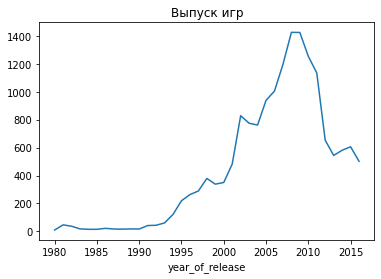

In [29]:
df.groupby('year_of_release')['name'].count().plot(title='Выпуск игр');

Виден рост после 90х годов. Я думаю он связан с появлением новых приставок и увеличением рынков. К примеру в 1994 появилась PS, выведший мир игр на новый уровень. Резкое падение думаю обусловлено кризисом 2008 года. Многие акции упали, а денег на разработку новых игр стали выделять меньше. Немаловажным послужило и уменьшение доходов населения.

## 3.2 Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Разберем за какой характерный срок появляются новые и исчезают старые платформы.
<a id='section_id13'></a>

 Посмотрите, как менялись продажи по платформам. 

In [30]:
agg_func_count = {'oll_sales': ['count', 'sum', 'mean', 'median', 'min', 'max']}
df.groupby(['platform']).agg(agg_func_count)

oll_sales                                       
             count      sum      mean median   min    max
platform                                                 
2600           116    86.48  0.745517  0.480  0.07   7.81
3DO              3     0.10  0.033333  0.020  0.02   0.06
3DS            512   257.81  0.503535  0.120  0.01  14.60
DC              52    15.95  0.306731  0.135  0.02   2.41
DS            2121   802.78  0.378491  0.110  0.01  29.80
GB              97   254.43  2.622990  1.180  0.06  31.38
GBA            811   312.88  0.385795  0.160  0.01  15.84
GC             542   196.73  0.362970  0.150  0.01   7.06
GEN             27    28.35  1.050000  0.150  0.03   6.02
GG               1     0.04  0.040000  0.040  0.04   0.04
N64            316   218.01  0.689905  0.270  0.01  11.90
NES             98   251.05  2.561735  1.375  0.06  40.24
NG              12     1.44  0.120000  0.100  0.02   0.25
PC             957   255.76  0.267252  0.050  0.01   8.01
PCFX             1     0.03  0.030000  0.030  0.03   0.03
PS            1190   727.58  0.611412  0.260  0.01  10.95
PS2           2127  1233.56  0.579953  0.230  0.00  20.81
PS3           1306   931.34  0.713124  0.280  0.00  21.05
PS4            392   314.14  0.801378  0.200  0.01  14.63
PSP           1193   289.53  0.242691  0.090  0.01   7.68
PSV            429    53.81  0.125431  0.050  0.01   1.96
SAT            173    33.59  0.194162  0.120  0.02   1.93
SCD              6     1.86  0.310000  0.065  0.04   1.50
SNES           239   200.04  0.836987  0.320  0.01  20.62
TG16             2     0.16  0.080000  0.080  0.02   0.14
WS               6     1.42  0.236667  0.215  0.03   0.51
Wii           1286   891.18  0.692986  0.190  0.01  82.54
WiiU           147    82.19  0.559116  0.220  0.01   7.09
X360          1232   961.24  0.780227  0.280  0.01  21.82
XB             803   251.57  0.313288  0.150  0.01   8.48
XOne           247   159.32  0.645020  0.220  0.01   7.39

In [31]:
#df.platform.value_counts().to_frame() #Так можно посмотреть количество продажь по платформам с самого большого до самого мпленького.

In [32]:
def sales(year_of_release, platform):
    list_s = df[(df['year_of_release'] == year_of_release) & (df['platform'] == platform)]
    list_count = list_s['name'].count()
    return(list_count)

In [33]:
sales(2010, 'PS2') #Написав платформу и год можно посмотреть сколько было сделано продажь.

38

In [34]:
platform_sales = df.pivot_table('oll_sales', index='platform', aggfunc
                                     ='sum').sort_values(by=['oll_sales'], ascending=False)

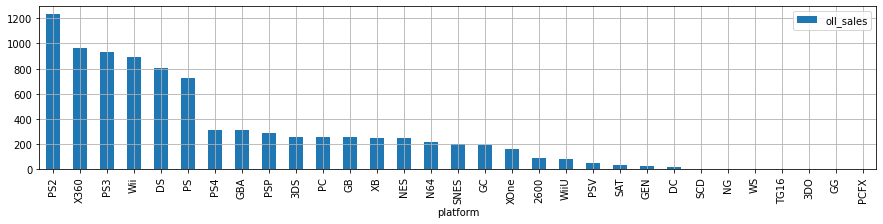

In [35]:
platform_sales.plot(kind='bar', figsize = (15,3), grid= True);

Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. 

Возьмем 6 платформ с наибольшими продажами, поскольку они сильно выделяются из всех.

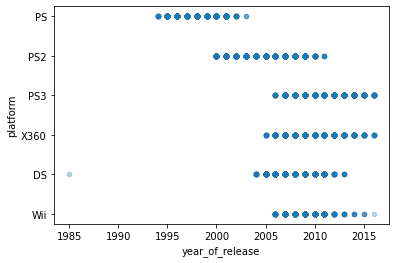

In [36]:
flat_spb = df.query('platform == ("PS2", "DS", "PS3", "Wii", "X360", "PS")')
flat_spb.plot(x='year_of_release', y='platform', kind='scatter', alpha=0.3);

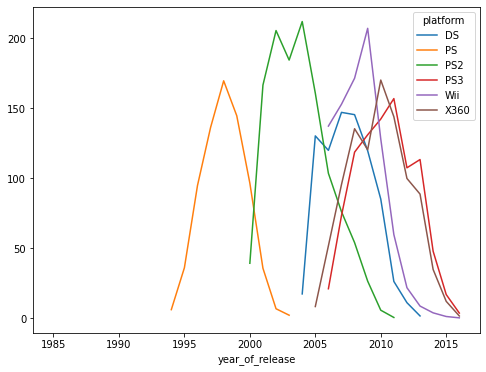

In [37]:
most_popular = df.groupby('platform').sum()['oll_sales'].sort_values(ascending=False).index.values[:6]

popular_df = df[df.platform.isin(most_popular)]
popular_df = popular_df.pivot_table(index='year_of_release', columns='platform', values='oll_sales', aggfunc='sum')
popular_df.plot(figsize=(8,6));

Как видно из графика пик популярности у самых продаваемых платформ прошел.

За какой характерный срок появляются новые и исчезают старые платформы?

В нашем случаи это от 10 до 12 лет, но давайте возьмем выборку побольше и посмотрим на ней.

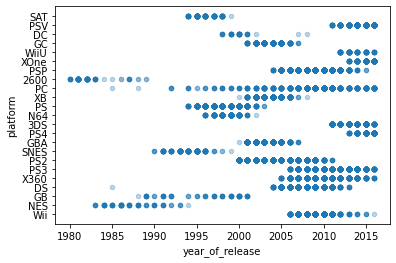

In [38]:
flat_spb = df.query('platform == ("PS2", "DS", "PS3", "Wii", "X360", "PS", "PSP", "PS", "PC", "GBA", "XB", "GC", "3DS", "PSV", "PS4", "N64", "XOne","SNES", "SAT", "WiiU", "2600", "NES", "GB", "DC")')
flat_spb.plot(x='year_of_release', y='platform', kind='scatter', alpha=0.3);

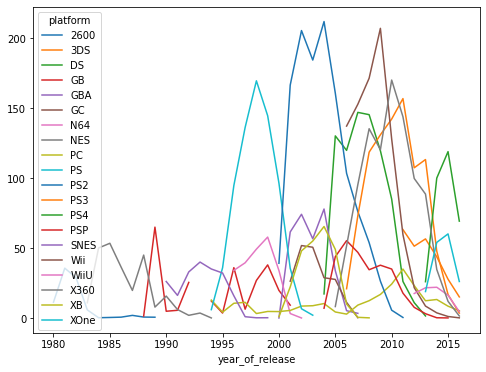

In [39]:
most_popular = df.groupby('platform').sum()['oll_sales'].sort_values(ascending=False).index.values[:20]

popular_df = df[df.platform.isin(most_popular)]
popular_df = popular_df.pivot_table(index='year_of_release', columns='platform', values='oll_sales', aggfunc='sum')
popular_df.plot(figsize=(8,6));

Где было совсем мало продаж мы нерасматриваем. Ясно, что где 1 продажа там 1 год существования и покажет (хотя платформа может и существовать и больше). Тут где то от 4 до 12 лет. PC лучше не рассматривать поскольку это не специализированная платформа для игр. Также XOne и PS4 лучше не расматривать так как они 2013 года. Чтобы описать за какое время исчезают платфрмы лучше не брать платформы у которых выходили релизы в 2016. Одной из причин исчезновения старых и появления новых платформ обусловленно выпуском новых поколений игровых приставок. Давайте для наглядности разберем 2 доминирующих линейки PlayStation: PS-1994, PS2-2000, PS3-2006, PS4-2013 и Xbox: XB-2002, X360-2005, XOne-2013.

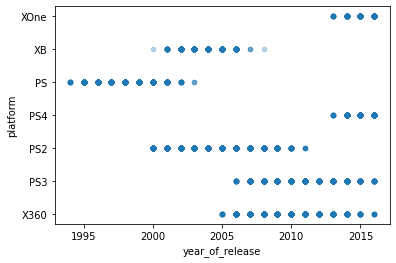

In [40]:
flat_spb = df.query('platform == ("PS", "PS2", "PS4", "PS3", "XB", "X360",  "XOne")')
flat_spb.plot(x='year_of_release', y='platform', kind='scatter', alpha=0.3);

Видно, что одно покаление перекрывает другое, а не заканчиваются сразу. Думаю, что средний срок жизни в 10 лет будет вполне коректной цифрой, а появление новых покалений в среднем каждые 7 лет.

## 3.3 Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
<a id='section_id14'></a>

<div class="alert alert-info">
<b> 
(1) Ну да. Неверно интерпритпровал ворос, подума, что актуальный равен примерно среднему жизненному циклу преставки, чтобы посмотреть дальнейшие тенденции, а 2017год как часть начала тренда. В 17 году казалось, что можно посмотреть на 10 лет вперед :)</b> 

</div>

Думаю учитывая, что 2016 год неполный, новые популярные платформы "PS4" и "XOne" вышли в 2013 году, также примерно с этого времени окончательно заканчивается влияние кризисных лет. Нашим актуальным периодом возьмем 3 года с 2014 по 2016.

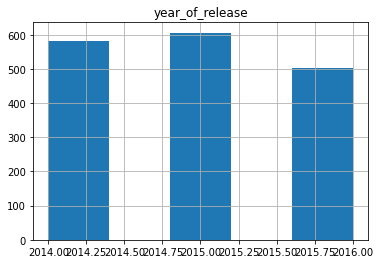

In [41]:
df.hist('year_of_release', range = (2014, 2016), bins=5);

График за 3 года растет думаю можно ожидать и дальнейший рос в игровой индустрии. Можно предположить, что в 2017 году рост продажь продолжится. Помним, что 2016 год неполный.

### 3.3.1 Не учитывайте в работе данные за предыдущие годы.
<a id='section_id15'></a>

Я так понимаю надо учитывать, что 2016 год неполный и возможно 1980 (в 1980 всего 9 прадаж.). Так же это значит что я должен взять данные  за актуальный периуд для платформ которые выбиру.

<div class="alert alert-info">
<b> 
(1) Из за неполной информации 2016 года на графиках кажетсяБ что подения спроса, что может сбвать с толку. Доверемся опыту и включим 2016 год. </b> 

</div>

In [42]:
#df.drop(index=df.query('year_of_release == 2016').index,inplace=True)
df.drop(index=df.query('year_of_release == 1980').index,inplace=True)

Для нового датасета уберем все платформы раньше 2014 года

In [43]:
df_10 = df[(df['year_of_release']>=2014)].copy()

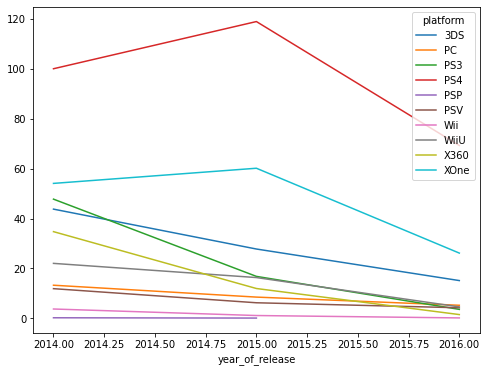

In [44]:
most_popular = df_10.groupby('platform').sum()['oll_sales'].sort_values(ascending=False).index.values[:17]

popular_df = df_10[df_10.platform.isin(most_popular)]
popular_df = popular_df.pivot_table(index='year_of_release', columns='platform', values='oll_sales', aggfunc='sum')
popular_df.plot(figsize=(8,6));

## 3.4 Посмотрим какие платформы лидируют по продажам. Выберим несколько потенциально прибыльных платформ.
<a id='section_id16'></a>

In [45]:
platform_sales_10 = df_10.pivot_table('oll_sales', index='platform', aggfunc
                                     ='sum').sort_values(by=['oll_sales'], ascending=False)

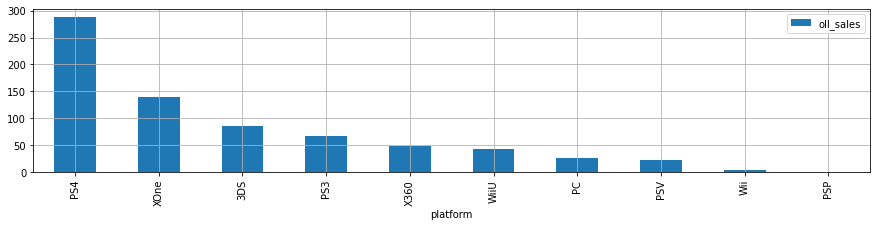

In [46]:
platform_sales_10.plot(kind='bar', figsize = (15,3), grid= True); #Построим график с актуальным дата сетом

Лидерами продаж в периуде с 2014г по 2016г. оказались "3DS", "PS4", "XOne". Из них только 2 растущих платформы.

<div class="alert alert-info">
<b> 
(1) Согласен 3DS своя ниша и на ее стоит обратить внимание</b> 

</div>

Из графика в пункте 3.3.1 можно выделить новых лидеров это PS4 и XOne, также можно обратить внимание на 3DS посольку это переносная консоль и у нее свой рынок и она лидер в своей игровой нише. РС не явлуяется консолью и у него нет жизненного цикла консоли, ПК постоянно модернизируются и производительность зависит от конкретной модели. Персанальные компьютеры не требуют столь высоких вложений на игры и достать бесплатно игру куда проще чем на консоль поэтому врядли она побъет продажи новых консолей с экслюзивами при ее выходи, но всегда найдет своего потребителя и когданибудь займет 1 места по продажам игр за все время, поскольку не имеет определенного жизненного цикла.

## 3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
<a id='section_id17'></a>

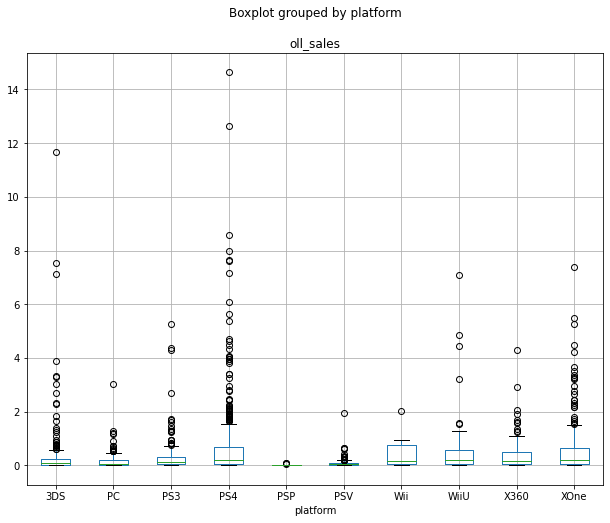

In [47]:
df_10.boxplot(by='platform', column='oll_sales', figsize=(10,8));

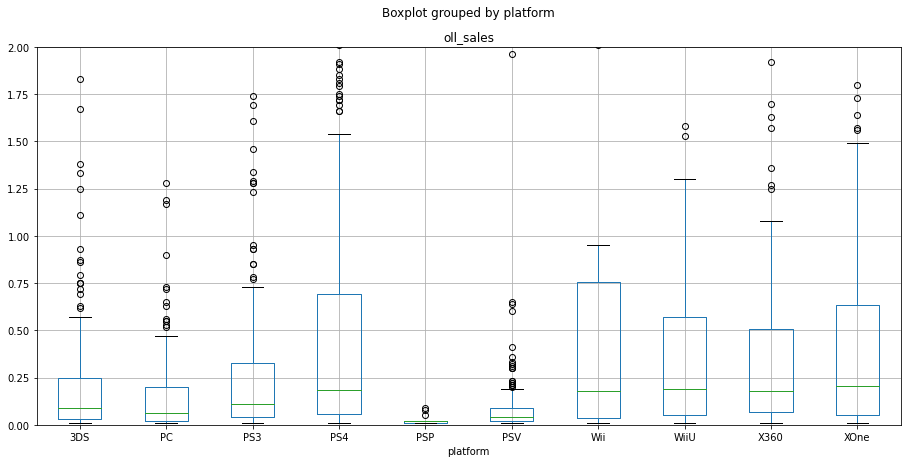

In [48]:
# сужаем диапазон до 3 млн продаж
df_10.boxplot(column='oll_sales', by='platform', figsize=(15,7))
# подгоняем данные по стороне 'Y'
plt.ylim(0, 2)
plt.show()

In [49]:
df_10.groupby('platform')['oll_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


Есть сильные выбросы по максимальным значениям. Это может быть связано с очень высокой популярностью игры. Ниже расмотрим 15 самых популярных игр. 

In [50]:
games = df_10.groupby('oll_sales')['name'].max()
games.tail(10)

oll_sales
7.17                                     Fallout 4
7.39                     Call of Duty: Black Ops 3
7.55           Super Smash Bros. for Wii U and 3DS
7.60                                       FIFA 17
7.66                Call of Duty: Advanced Warfare
7.98                  Star Wars Battlefront (2015)
8.58                                       FIFA 16
11.68    Pokemon Omega Ruby/Pokemon Alpha Sapphire
12.62                           Grand Theft Auto V
14.63                    Call of Duty: Black Ops 3
Name: name, dtype: object

Действительно популярные игры, даже я почти о всех слышал.

In [51]:
#df_10.groupby('platform')['oll_sales'].median() #просто если постотреть медиану по платформам

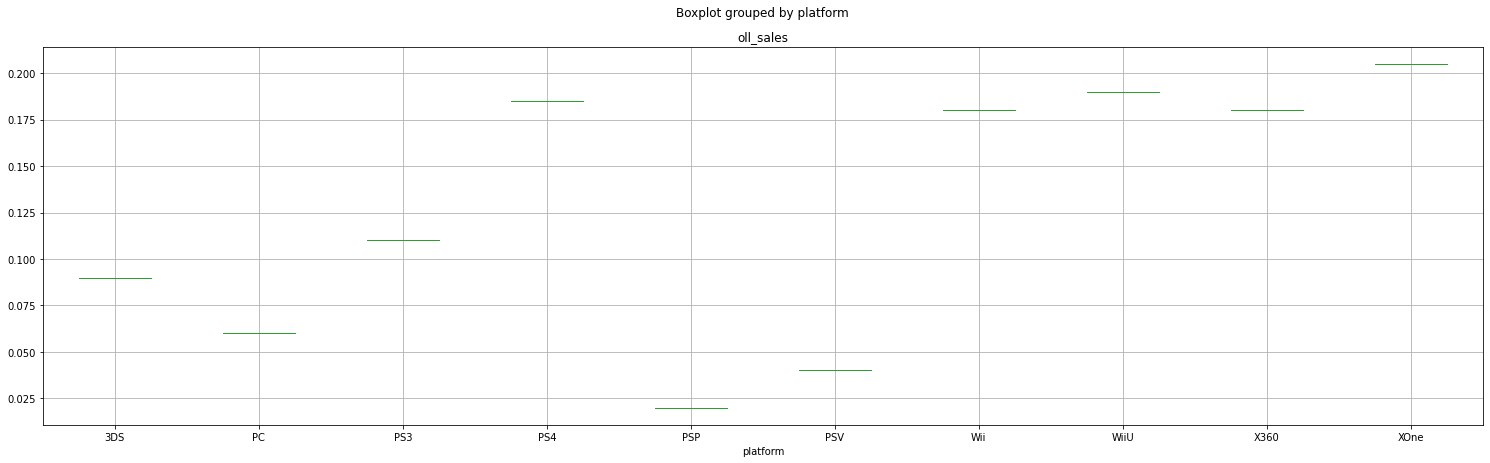

In [52]:
# смотрим популярность жанров исходя из нашей выборки
(
df_10.pivot_table(index='platform', values='oll_sales', aggfunc='median')
.boxplot(column='oll_sales', by='platform', figsize=(25,7))
)
plt.show()

In [53]:
df_10.pivot_table(index='platform', values='oll_sales', aggfunc=['median','count']) #Постотреть медиану по платформам с количеством продаж

,median,count
,oll_sales,oll_sales
platform,,
3DS,0.090,212
PC,0.060,151
PS3,0.110,219
PS4,0.185,376
PSP,0.020,13
PSV,0.040,295
Wii,0.180,11
WiiU,0.190,73


По медеанным продажам лидирует XOne. Также можно выделить WiiU, X360, PS4 у остальных медиана значительно ниже.

## 3.6 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
<a id='section_id18'></a>

За папулярную платформу мы возьмем PS4.

График меньше 0 это те значения которые были пропущены и мы подставили значение -1. Поэтому их нестоит расматривать при заключении вывода о влиянии рейтинга.

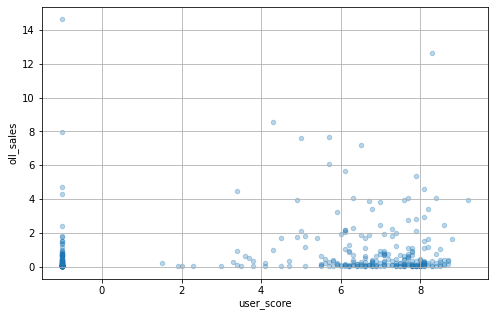

In [54]:
# выведем таблицу рассеивания по платформе PS4, отобразив отзывы пользователей
df_10[df_10['platform']=='PS4'].plot(x='user_score', y='oll_sales', kind='scatter', alpha=0.3, figsize=(8,5), grid=True);

Отзывы пользователей невсегда означают высокие продажи и прямо зависимсти на графики не прослеживается. Есть выбросы у игр с невысоким рейтингом. Хотя у игр с совсем низким рейтингом не наблюдаются высокие продажи.

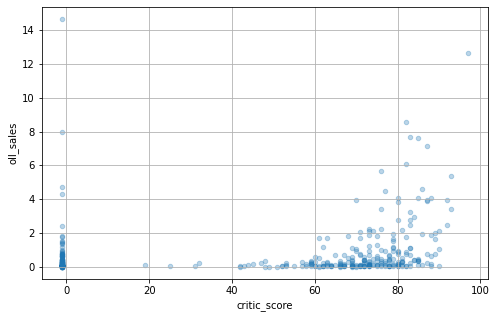

In [55]:
# выведем таблицу рассеивания по платформе PS4, отобразив отзывы критиков
df_10[df_10['platform']=='PS4'].plot(x='critic_score', y='oll_sales', kind='scatter', alpha=0.3, figsize=(8,5), grid=True);

Зависимость мнение критиков и продажами выглядят более взаимозависимы. Чем выше бал критиков тем выше продажи хотя совсем прямой связи тут тоже не наблюдаются. В продаже игр с 80 балами даже больше чем с 90 балами.

In [56]:
# Метод через перебор (ответ в процентах) если не убирать заглушку -1
#list_for_graph = ['user_score',
#                  'critic_score']
#for entry in list_for_graph:
#    correlation =df_ps4['oll_sales'].corr(df_ps4[entry])
#    print(f'Корреляция между oll_sales и {entry} составляет: {correlation:0.1%}')
#Корреляция между oll_sales и user_score составляет: 9.9%
#Корреляция между oll_sales и critic_score составляет: 16.5%

In [57]:
# вычислим корреляционную матрицу, диапазон элементов для PS4
df_ps4 = df_10[df_10['platform']=='PS4']
#создаем выгрузку без заглушек
df_ps4_user = df_ps4[df_ps4['user_score'] != -1]
df_ps4_critic = df_ps4[df_ps4['critic_score'] != -1]

In [58]:
# Прямой метод вычисления (ответ в долях)
data_without_user_cor = df_ps4_user['user_score'].corr(df_ps4_user['oll_sales'])
data_without_critic_cor = df_ps4_critic['critic_score'].corr(df_ps4_critic['oll_sales'])
display('Корреляция: {}'.format(data_without_user_cor))
display('Корреляция: {}'.format(data_without_critic_cor))

'Корреляция: -0.040131589472697356'

'Корреляция: 0.40266141068104083'

И если кореляция между оценкой пользователей и продажами очень слабая то между оценкой критиков и продажами умеренная, что и подтверждают графики.

## 3.7 Соотнесем выводы с продажами игр на других платформах.
<a id='section_id19'></a>

In [59]:
#df_popular = df_10[df_10.platform.isin(most_popular)] #популярные платформы в актуальный периуд
#df_popular_grouped = df_popular.groupby('platform').sum()
#popular_platforms_list = df_popular_grouped.index.values

In [60]:
data_user = df_10[df_10['user_score'] != -1]
data_critic = df_10[df_10['critic_score'] != -1]

In [61]:
# Метод через перебор (ответ в процентах) если не убирать заглушку -1
list_for_graph = ['user_score']
for entry in list_for_graph:
    correlation =data_user['oll_sales'].corr(data_user[entry])
    print(f'Корреляция между oll_sales и {entry} составляет: {correlation:0.1%}')

Корреляция между oll_sales и user_score составляет: -1.3%


In [62]:
list_for_graph = ['critic_score']
for entry in list_for_graph:
    correlation =data_critic['oll_sales'].corr(data_critic[entry])
    print(f'Корреляция между oll_sales и {entry} составляет: {correlation:0.1%}')

Корреляция между oll_sales и critic_score составляет: 32.8%


Если взять все данные по имеющимся платформам за 10 лет получится похожая картина корреляции между отзывами и продажами, но менее выраженная. Теперь кореляция между оценкой пользователей и продажами очень слабая то между оценкой критиков и продажами умеренная.

## 3.8 Посмотрим на общее распределение игр по жанрам.
<a id='section_id20'></a>

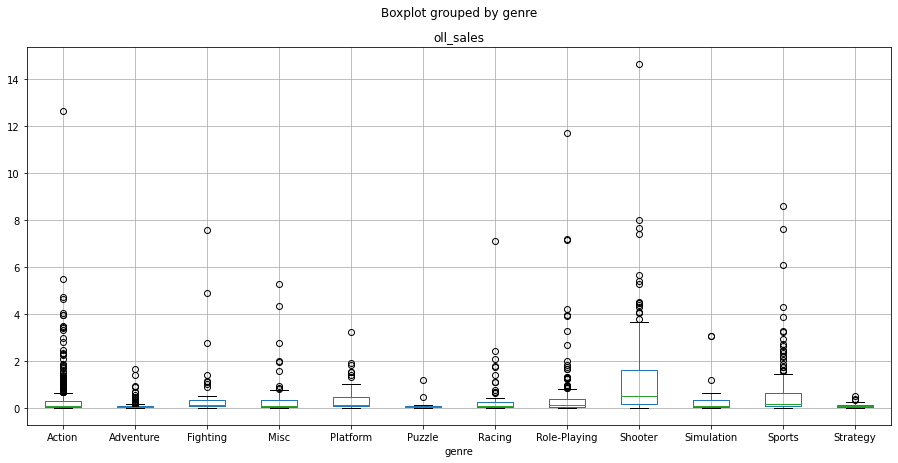

In [63]:
df_10.boxplot(by='genre', column='oll_sales', figsize=(15,7));

Конечно есть ощутимая разница между продажами игр с разными жанрами. Для наглядности давайти посмотрим среднее по жанрам.

In [64]:
df_10.groupby('genre').mean()['oll_sales'].sort_values(ascending=False)

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: oll_sales, dtype: float64

Самым прибыльным жанром оказался Shooter - в нем нет выбросов в виде супер популярных игр как в другом популярном жанре Sports.

Жанры с высокими и низкими продажами довольно сильно отличаются. Лидируют Shooter, Sports в одстающих Puzzle, Strategy.

### Резюмирую:

* 3.1 Игры выпускались в разные годы сильно по разному. Резкое падеие скорее всего обусловлено кризисом 2008 года.

* 3.2 Появляются новые и исчезают старые платформы где то от 4 до 12 лет. PC лучше не рассматривать поскольку это не специализированная платформа для игр. 

* 3.3 Учитывая 2016 год помним, что он может быть не полным. Актуальный периуд взяли за 3 года, поэтому для нового датасета уберем все платформы раньше 2014 года

* 3.4 Лидерами продаж в периуде с 2014г по 2016г. оказались "3DS", "PS4", "XOne". Из них только 2 растущих платормы PS4 и XOne. Следуя общему тренду 2017г. должен быть благоприятным для PS4 и XOne. 3DS тоже можно расмотркть у них свой сегмент карманной приставки.

* 3.5 Есть сильные выбросы по максимальным значениям продажь, это может быть связано с очень высокой популярностью отдельных игр. По медеанным продажам лидирует XOne. Также можно выделить WiiU, X360, PS4 у остальных медиана значительно ниже.

* 3.6 За папулярную платформу мы возьмем PS4. Зависимость от отзывы пользователей очнь слабая, а от отзывов критиков умеренная.
* 3.7 Корреляция между oll_sales и user_score составляет: 8.0%. Корреляция между oll_sales и critic_score составляет: 22.6%. Если взять все данные по имеющимся платформам за 10 лет корреляции между отзывами и продажами менее выраженная. Здесь кореляция между оценкой пользователей и продажами очень слабая то между оценкой критиков и продажами слабая.
* 3.8 Жанры с высокими и низкими продажами сильно отличаются. Лидируют Shooter, Platform, Sports в одстающих Puzzle, Strategy, Adventure.

# Шаг 4. Составим портрет пользователя каждого региона
<a id='section_id21'></a>

[обратно к содежанию](#section_id2)

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

## 4.1 Самые популярные платформы (топ-5). Опишем различия в долях продаж.
<a id='section_id22'></a>

Самые популярные платформы в Северной Америке (NA). Был взят актуальный периуд c 2014 по 2016 

In [65]:
na_platform = df_10.groupby('platform').na_sales.mean().sort_values(ascending=False)[:5]
na_platform

platform
XOne    0.356447
WiiU    0.265205
PS4     0.262261
X360    0.254955
Wii     0.189091
Name: na_sales, dtype: float64

Самые популярные платформы в продажи в Европе (EU). Был взят актуальный периуд c 2014 по 2016 

In [66]:
eu_platform = df_10.groupby('platform').eu_sales.mean().sort_values(ascending=False)[:5]
eu_platform

platform
PS4     0.345851
Wii     0.235455
XOne    0.202851
WiiU    0.180137
X360    0.139550
Name: eu_sales, dtype: float64

Самые популярные платформы в Японии (JP). Был взят актуальный периуд c 2014 по 2016 

In [67]:
jp_platform = df_10.groupby('platform').jp_sales.mean().sort_values(ascending=False)[:5]
jp_platform

platform
3DS     0.208679
WiiU    0.100137
PS3     0.051233
PSV     0.049288
PS4     0.039947
Name: jp_sales, dtype: float64

In [68]:
data_platform = pd.DataFrame(data=[na_platform, eu_platform, jp_platform]).T
data_platform

,na_sales,eu_sales,jp_sales
platform,,,
XOne,0.356447,0.202851,NaN
WiiU,0.265205,0.180137,0.100137
PS4,0.262261,0.345851,0.039947
X360,0.254955,0.139550,NaN
Wii,0.189091,0.235455,NaN
3DS,NaN,NaN,0.208679
PS3,NaN,NaN,0.051233
PSV,NaN,NaN,0.049288


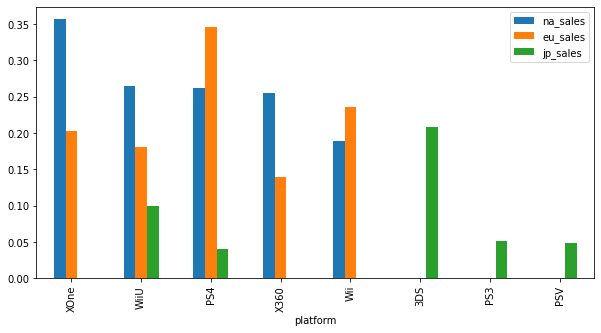

In [69]:
data_platform.plot(kind='bar',figsize=(10,5));

Исходя из средних продаж с 2014 по 2016 японский рынок более обособленный, а североамериканский и европейский идут вместе. Единственная платформа которая пресутствует везде из топ 5 это  PS3 и WiiU.

Самые популярные платформы по сумарным продажам (топ 5). Был взят актуальный периуд c 2014 по 2016

In [70]:
na_platform_sum = df_10.groupby('platform').na_sales.sum().sort_values(ascending=False)[:5]
na_platform_sum

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

In [71]:
eu_platform_sum = df_10.groupby('platform').eu_sales.sum().sort_values(ascending=False)[:5]
eu_platform_sum

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

In [72]:
jp_platform_sum = df_10.groupby('platform').jp_sales.sum().sort_values(ascending=False)[:5]
jp_platform_sum

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

In [73]:
data_platform_sum = pd.DataFrame(data=[na_platform_sum, eu_platform_sum, jp_platform_sum]).T
data_platform_sum

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,NaN
X360,28.30,NaN,NaN
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22
PC,NaN,17.97,NaN
PSV,NaN,NaN,14.54
WiiU,NaN,NaN,7.31


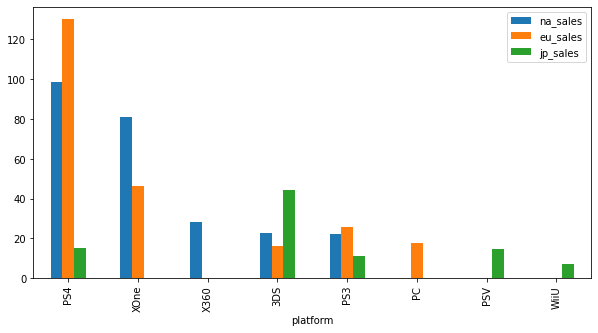

In [74]:
data_platform_sum.plot(kind='bar',figsize=(10,5));

Исходя из суммарных продаж японский рынок более обособленный, а североамериканский и европейский менее.

## 4.2 Самые популярные жанры (топ-5). Поясните разницу
<a id='section_id23'></a>

Самые популярные жанры по средней продаж. Был взят актуальный периуд c 2014 по 2016 год 

In [75]:
na_genre = df_10.groupby('genre').na_sales.mean().sort_values(ascending=False)[:5]
na_genre

genre
Shooter         0.617344
Sports          0.286522
Fighting        0.207167
Platform        0.178684
Role-Playing    0.151448
Name: na_sales, dtype: float64

In [76]:
eu_genre = df_10.groupby('genre').eu_sales.mean().sort_values(ascending=False)[:5]
eu_genre

genre
Shooter       0.511875
Sports        0.284037
Racing        0.204783
Platform      0.178947
Simulation    0.165909
Name: eu_sales, dtype: float64

In [77]:
jp_genre = df_10.groupby('genre').jp_sales.mean().sort_values(ascending=False)[:5]
jp_genre

genre
Role-Playing    0.140995
Fighting        0.106167
Platform        0.070789
Puzzle          0.066429
Simulation      0.052500
Name: jp_sales, dtype: float64

In [78]:
data_genre = pd.DataFrame(data=[na_genre, eu_genre, jp_genre]).T
data_genre

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,0.617344,0.511875,NaN
Sports,0.286522,0.284037,NaN
Fighting,0.207167,NaN,0.106167
Platform,0.178684,0.178947,0.070789
Role-Playing,0.151448,NaN,0.140995
Racing,NaN,0.204783,NaN
Simulation,NaN,0.165909,0.052500
Puzzle,NaN,NaN,0.066429


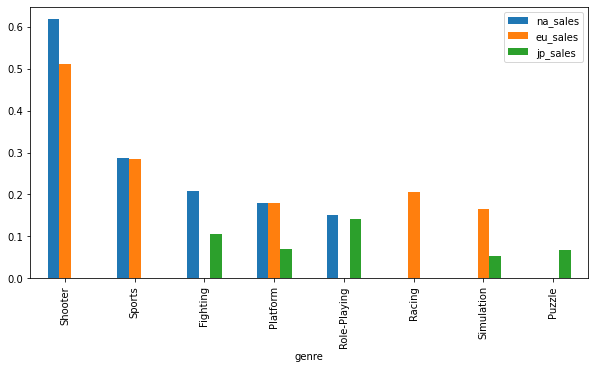

In [79]:
data_genre.plot(kind='bar',figsize=(10,5));

Исходя из средних продаж Японский рынок более обособленный, а североамериканский и европейский менее. Единственный жанр который пресутствует везде из топ 5 это Platform.

Самые популярные жанры по сумарным продажам. Был взят актуальный периуд c 2014 по 2016 год 

In [80]:
na_genre_sum = df_10.groupby('genre').na_sales.sum().sort_values(ascending=False)[:5]
na_genre_sum

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [81]:
eu_genre_sum = df_10.groupby('genre').eu_sales.sum().sort_values(ascending=False)[:5]
eu_genre_sum

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [82]:
jp_genre_sum = df_10.groupby('genre').jp_sales.sum().sort_values(ascending=False)[:5]
jp_genre_sum

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

In [83]:
data_genre_sum = pd.DataFrame(data=[na_genre_sum, eu_genre_sum, jp_genre_sum]).T
data_genre_sum

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,79.02,65.52,4.87
Action,72.53,74.68,29.58
Sports,46.13,45.73,NaN
Role-Playing,33.47,28.17,31.16
Misc,15.05,NaN,5.61
Racing,NaN,14.13,NaN
Fighting,NaN,NaN,6.37


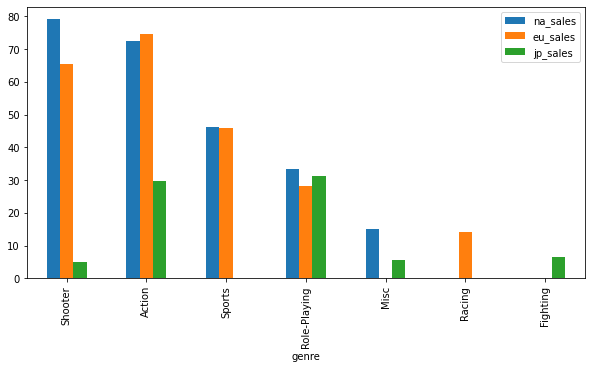

In [84]:
data_genre_sum.plot(kind='bar',figsize=(10,5));

Исходя из суммарных продаж, жанрф который пресутствует везде из топ 5 это Sports, Action, Role-Playing.

## 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе
<a id='section_id24'></a>

In [85]:
na_rating = df_10.groupby('rating').na_sales.mean().sort_values(ascending=False)[:]
na_rating

rating
M            0.363849
E            0.231689
E10+         0.179622
T            0.143727
No rating    0.086409
Name: na_sales, dtype: float64

In [86]:
eu_rating = df_10.groupby('rating').eu_sales.mean().sort_values(ascending=False)[:]
eu_rating

rating
M            0.352604
E            0.265114
E10+         0.141405
T            0.125720
No rating    0.078705
Name: eu_sales, dtype: float64

In [87]:
jp_rating = df_10.groupby('rating').jp_sales.mean().sort_values(ascending=False)[:]
jp_rating

rating
No rating    0.075968
T            0.054539
E            0.040822
M            0.030226
E10+         0.024108
Name: jp_sales, dtype: float64

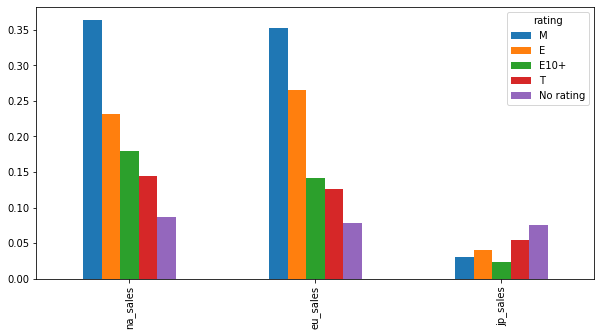

In [88]:
data_rating = pd.DataFrame([na_rating, eu_rating, jp_rating])
data_rating.plot(kind='bar', figsize=(10,5));

Рейтинг по средним значениям за 2014-1016 год. ESRB на продажи в отдельном регионе влияет. К примеру в Северной Америке М наиболее популярный жанр как и в Европе, а вот в японии рейтинг Т самый популярный. Также Е в Северной Америке второй по популярности как и в европе и в японии.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Тоже средние

In [89]:
na_rating_sum = df_10.groupby('rating').na_sales.sum().sort_values(ascending=False)[:]
na_rating_sum

rating
M            96.42
No rating    64.72
E            50.74
T            38.95
E10+         33.23
Name: na_sales, dtype: float64

In [90]:
eu_rating_sum = df_10.groupby('rating').eu_sales.sum().sort_values(ascending=False)[:]
eu_rating_sum

rating
M            93.44
No rating    58.95
E            58.06
T            34.07
E10+         26.16
Name: eu_sales, dtype: float64

In [91]:
jp_rating_sum = df_10.groupby('rating').jp_sales.sum().sort_values(ascending=False)[:]
jp_rating_sum

rating
No rating    56.90
T            14.78
E             8.94
M             8.01
E10+          4.46
Name: jp_sales, dtype: float64

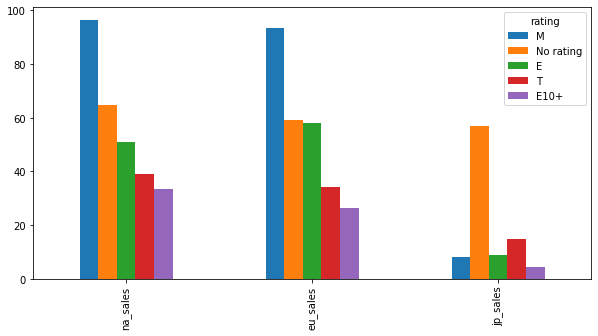

In [92]:
data_rating_sum = pd.DataFrame([na_rating_sum, eu_rating_sum, jp_rating_sum])
data_rating_sum.plot(kind='bar', figsize=(10,5));

Рейтинг по сумарным значениям за 2014-1016 год. ESRB на продажи в отдельном регионе влияет. К примеру в Северной Америке Е наиболее популярный жанр как и в Европе, а вот в японии рейтингвидимо дают реже. Хотя из известных Е самый популярный.

### Резюмирую:

* Был взят актуальный периуд c 2014 по 2016 по сумарным  и средим значениям.
* 4.1 Самые популярные платформы в Северной Америке (NA). Японский рынок более обособленный, а североамериканский и европейский менее.

* 4.2 Самые популярные жанры в Северной Америке (NA).  Японский рынок более обособленный, а североамериканский и европейский менее.

* 4.3 Рейтинг ESRB на продажи в отдельном регионе влияет. 

# Шаг 5. Проверяем гипотезы
<a id='section_id25'></a>

[обратно к содежанию](#section_id2)

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.

* Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

Задайте самостоятельно пороговое значение alpha.
Мы признаём 95%-ю вероятность достаточной, данный уровень распостранен при определении значимости. Поэтому alpha = 0.05

## 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
<a id='section_id26'></a>

* Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой и альтернативной гипотезы мы взяли следующее:
* H0: средние рейтинги по платформам одинаковые
* H1: средние рейтинги по платформам разные

In [93]:
#создаем выгрузку без заглушек
df_without_user = df[df['user_score'] != -1]

In [94]:
# две выборки по необходимым платформам
data_xbox = df_without_user[df_without_user['platform'] == 'XOne']
data_pc = df_without_user[df_without_user['platform'] == 'PC']
# обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
xbox_1 = data_xbox['user_score']
pc_1 = data_pc['user_score']
alpha = 0.05 # критический уровень статистической значимости если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(xbox_1, pc_1)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


In [95]:
#создаем выгрузку без заглушек за актуальный периуд
df_10_without_user = df_10[df_10['user_score'] != -1]

In [96]:
# две выборки по необходимым платформам
data_xbox_10 = df_10_without_user[df_10_without_user['platform'] == 'XOne']
data_pc_10 = df_10_without_user[df_10_without_user['platform'] == 'PC']
# обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
xbox_2 = data_xbox_10['user_score']
pc_2 = data_pc_10['user_score']
alpha = 0.05 # критический уровень статистической значимости если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(xbox_2, pc_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


## 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
<a id='section_id27'></a>

* Для проверки гипотезы "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные." в качестве нулевой и альтернативной гипотезы мы взяли следующее:
* H0: средние пользовательские рейтинги жанров Action и Sports одинаковые
* H1: средние пользовательские рейтинги жанров Action и Sports разные

In [97]:
# две выборки по необходимым платформам
data_Action = df_without_user[df_without_user['genre'] == 'Action']
data_Sports = df_without_user[df_without_user['genre'] == 'Sports']
# обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
Action_1 = data_Action['user_score']
Sports_1 = data_Sports['user_score']
alpha = 0.05 # критический уровень статистической значимости если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(Sports_1, Action_1)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 0.06480928064420527
Отвергаем нулевую гипотезу


Нулевая гипотеза должна говорит о отсутствии различий, а альтернативную мы формируем как сами думаем. Первый нашь вопрос содержал понятия равенства (относился к 0 гипотезе), второй говорил о разности (относился к альтернативной гипотезе).

Проверка двусторонней гипотезы в python: t-тест. Мы проходили ее в Статистический анализ данных подраздели проверка гипотез. Такой метод является наиболее простым и подходящим для нашей задачи.

In [98]:
# две выборки по необходимым платформам за актуальный периуд
data_Action_10 = df_10_without_user[df_10_without_user['genre'] == 'Action']
data_Sports_10 = df_10_without_user[df_10_without_user['genre'] == 'Sports']
# обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
Action_2 = data_Action_10['user_score']
Sports_2 = data_Sports_10['user_score']
alpha = 0.05 # критический уровень статистической значимости если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(Sports_2, Action_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Не получилось отвергнуть нулевую гипотезу


### Резюмирую:
* 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. t-тест показал несостоятельность нулевой гипотезы
* 5.2 Средние пользовательские рейтинги жанров Action и Sports разные. t-тест показал несостоятельность нулевой гипотезы
* Нулевая гипотеза должна говорит о отсутствии различий,.
* Мы воспользуемся проверкой двусторонней гипотезы в python: t-тест.

# Шаг 6. Напишите общий вывод
<a id='section_id28'></a>

[обратно к содежанию](#section_id2)

### 6.2 Подготовка данных.

### 6.1 Описание проекта и общая информация.
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 
* Перед нами данные с 1980 до 2016 года.
* Датосет состоит из 16715 строк и 11 столбцов

* Привели название столбцов к нижнему регистру. Меняем тип данных для большего быстродействия year_of_release и critic_score  меняем на int, user_score в float. 

* Обривеатура tbd переводится как "подлежит уточнению" и чаще всего говарит о том, что какая-то информация еще не определена или решение по вопросу не принято.Для наших задачь нет различия NaN или неопределено поэтому переделали в NaN.
* В critic_score и user_score  заменим пропуски на -1.
* В строке name и genre по 2 пропуска, мы их удалим. В year_of_release пропусков менее 2% их тоже удаляем. 
* Rating — пропуски переделаем в No rating для дальнейшей работы.
* Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

### 6.3 Проведение исследовательского анализа данных

#### 6.3.1 Посмотрим, сколько игр выпускалось в разные годы.
Игры выпускались в разные годы сильно по разному. И годы с невысоким значением выпуска игр не так важны. Значения с невысокими значениями могут оказатся анамальными при отдельном их расмотрении из за невысокой выборки.
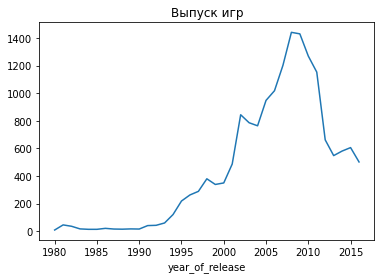
Видин рост после 90х годов. Резкое падеие скорее всего обусловлено кризисом 2008 года, после него упало финансирование новых продуктов и снизился спрос в целом. 

#### 6.3.2 Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и постройте распределение по годам. Разберем за какой характерный срок появляются новые и исчезают старые платформы.

Посмотрим, как менялись продажи по годам топ у 20 платформ.
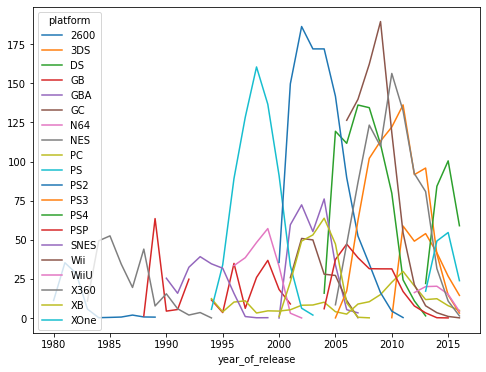
Появляются новые и исчезают старые платформы где то от 4 до 12 лет, среднем можно назвать 10 лет. PC лучше не рассматривать поскольку это не специализированная платформа для игр. Одной из причин исчезновения старых и появления новых платформ обусловленно выпуском новых поколений игровых приставок с новыми возможносятямии устаревания старых.

#### 6.3.3 Определим актуальный период.
Будем учитывать, что 2016 год  может быть не полным и 1980 (в 1980 всего 9 прадаж.). Актуальный периуд взяли за 3 года, поэтому для нового датасета уберем все платформы раньше 2014 года.
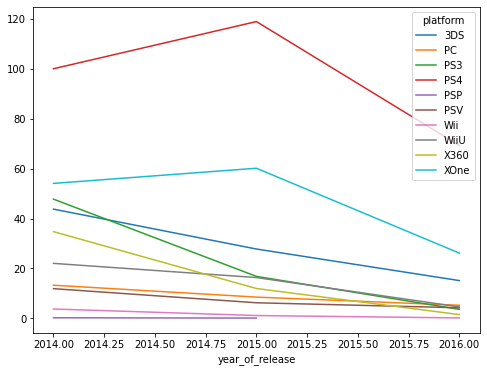

#### 6.3.4 Посмотрим какие платформы лидируют по продажам. Выберим несколько потенциально прибыльных платформ.

Лидерами продаж в периуде с 2005г по 2015г. оказались "DS", "PS3", "Wii", "X360". Но они нам неподходят для нашего деселетнего цикла поскольку не являются потанцеально прибыльными. Из графика выше видим, что осталось только 2 растущих платформы.

Выделили PS4 и XOne. РС не явлуяется консолью и у него нет жизненного цикла консоли. Поскольку PS4 и XOne вышли в 2013 то их перспективы можно расчитывать до 2024 года, но надо помнить что к 2020 выпустят новое поколение и продажа игр неизбежно будет падать. Также на 2020 год может притись и кризис или сильно повысится шанс его возникновения. Следуя общему тренду 2017г. должен быть благоприятным для PS4 и XOne.

####  6.3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
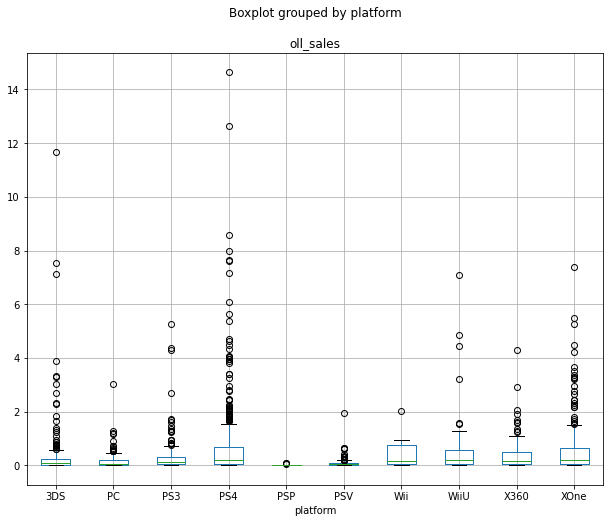
Есть сильные выбросы по максимальным значениям. Это может быть связано с очень высокой популярностью отдельных игр.

#### 6.3.6 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
За папулярную платформу мы возьмем PS4.

График меньше 0 это те значения которые были пропущены и мы подставили значение -1. Поэтому их нестоит расматривать при заключении вывода о влиянии рейтинга.
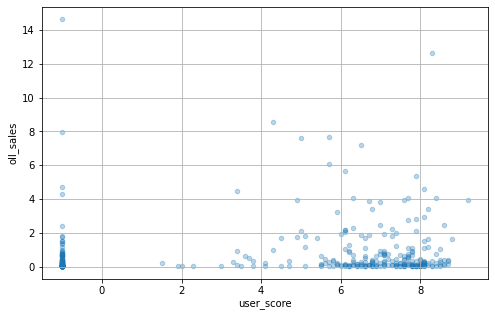
* 'Корреляция: 0.04 очнь слабая
* Отзывы пользователей невсегда означают высокие продажи и прямо зависимсти на графики не прослеживается. Есть выбросы у игр с невысоким рейтингом.
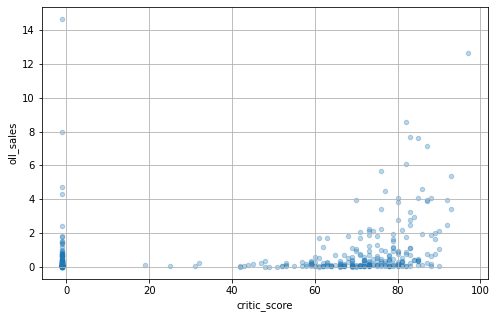
* 'Корреляция: 0.40 умеренная
* Зависимость мнение критиков и продажами выглядят более взаимозависимы. Чем выше бал критиков тем выше продажи хотя совсем прямой связи тут тоже не наблюдаются. В продаже игр с 80 балами даже больше чем с 90 балами.


####  6.3.7 Соотнесите выводы с продажами игр на других платформах.
* Корреляция между oll_sales и user_score составляет: -1.3%.
* Корреляция между oll_sales и critic_score составляет: 32.8%
* Если взять все данные по имеющимся платформам за актуальный периуд получится похожая картина корреляции между отзывами и продажами, но менее выраженная. Здесь кореляция между оценкой пользователей и продажами очень слабая то между оценкой критиков и продажами умеренная.

#### 6.3.8 Посмотрим на общее распределение игр по жанрам.
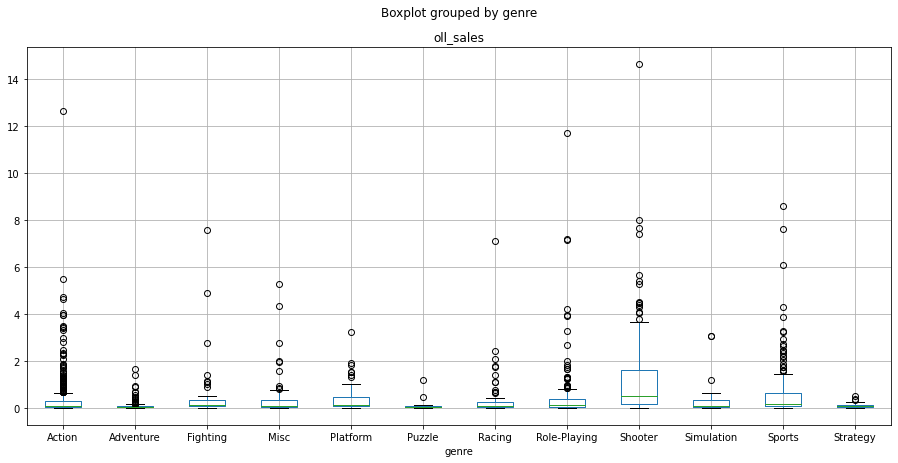
Жанры с высокими и низкими продажами сильно отличаются. Лидируют Shooter, Sports в одстающих Puzzle, Strategy.

###  6.4. Составьте портрет пользователя каждого региона

#### 4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные платформы по сумарным продажам (топ 5). Был взят актуальный периуд c 2014 по 2016
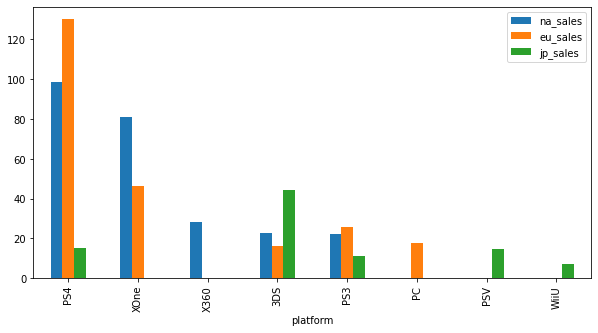
Японский рынок более обособленный, а североамериканский и европейские менее.
#### 4.2 Самые популярные жанры (топ-5). Поясните разницу
Самые популярные жанры по сумарным продажам. Был взят актуальный периуд c 2014 по 2016 год 
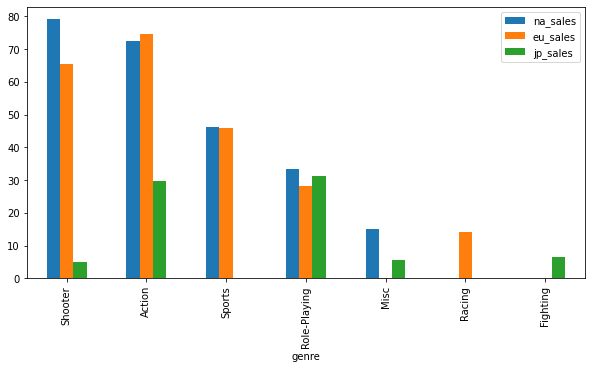
Исходя из суммарных продаж, жанрф который пресутствует везде из топ 5 это Sports, Action, Role-Playing.
#### 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе
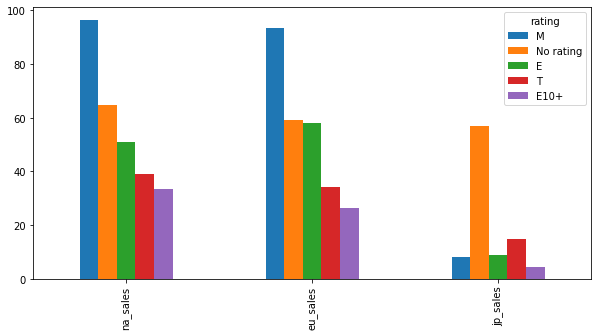
Рейтинг по сумарным значениям за 2014-1016 год. ESRB на продажи в отдельном регионе влияет. К примеру в Северной Америке Е наиболее популярный жанр как и в Европе, а вот в японии рейтингвидимо дают реже. Хотя из известных Е самый популярный.

###  Шаг 5. Проверьте гипотезы

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой и альтернативной гипотезы мы взяли следующее: 
* H0: средние рейтинги по платформам одинаковые 
* H1: средние рейтинги по платформам разные
* t-тест показал несостоятельность нулевой гипотезы (за все время)
* t-тест показал не получилось отвергнуть нулевую гипотезу (при актуальном периуди)

#### 5.2 Средние пользовательские рейтинги жанров Action  и Sports  разные.
* Для проверки гипотезы "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные." в качестве нулевой и альтернативной гипотезы мы взяли следующее:
* H0: средние пользовательские рейтинги жанров Action и Sports одинаковые
* H1: средние пользовательские рейтинги жанров Action и Sports разные
* t-тест показал несостоятельность нулевой гипотезы (за все время)
* t-тест показал, что не получилось отвергнуть нулевую гипотезу (за актуальный периуд)

* Нулевая гипотеза должна говорит о отсутствии различий, а альтернативную мы формируем как сами думаем. Первый нашь вопрос содержал понятия равенства (относился к 0 гипотезе), второй говорил о разности (относился к альтернативной гипотезе).

* Проверка двусторонней гипотезы в python: t-тест. Такой метод является наиболее простым и подходящим для нашей задачи.